# Tulajdoni hányad adat tisztítás

In [1]:
#Csomag importok és input mappa ellenőrzése

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy  as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import re
import sklearn
import math

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from pandas import DataFrame , read_csv

import seaborn as sns

%pylab inline

%matplotlib inline

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


for f in os.listdir('../input'):
    print (f.ljust(30)+ str(round(os.path.getsize('../input/' + f), 2)) + ' Byte')

# Any results you write to the current directory are saved as output.

Populating the interactive namespace from numpy and matplotlib
th.csv                        138305 Byte


In [2]:
# Getting Data from CSV files
# Reading the csv file into a dataframe

# Szemrevételezés

df = pd.read_csv('../input/th.csv')
df.head(100)

,arveres_id,tetel_tulajdoni_hanyad
0,308084,1/6
1,308085,1/1
2,308087,2/2
3,308625,1/2+1/2 (összesen: 2
4,309448,1/1
5,309596,1/1
6,309658,1/1
7,309707,1/1
8,309793,1/1
9,310725,1/1


In [3]:
# a 11. sortól értékes df
df.info()

print(40*'_')

df[11:].info()
# Few of the Points from the summary include 
#  1. The dataframe has 2 columns 
#  2. The 0-10 rows replay from 11-th row 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 2 columns):
arveres_id                10044 non-null object
tetel_tulajdoni_hanyad    10044 non-null object
dtypes: object(2)
memory usage: 157.0+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10033 entries, 11 to 10043
Data columns (total 2 columns):
arveres_id                10033 non-null object
tetel_tulajdoni_hanyad    10033 non-null object
dtypes: object(2)
memory usage: 156.8+ KB


# "Hátulról darabolós" kiértékelés
A "tetel_tulajdoni_hanyad" stringjeit hátulról karakterenként rövidítve addig daraboljuk, amíg 
az eval() int, vagy float értéket ad vissza. Addigra már levágtuk a betűket, a .?!:*_ ... jeleket, mert általában az eleje 
használható. De a végéről közelítünk.

Ha így nem sikerül, akkor még megnézzük, hogy szerepel-e benne 1/1. Valahogy meg kellene különböztetni,hogy 1/1 # 1/100, ...






In [5]:
# 1. funcion: eval() "tetel_tulajdoni_hanyad") hátulról darabolós kiértékelés kiértékelhetőségig
#    ha sikerül, akkor !=0 értéket ad vissza, egyébként None

#betűk, írásjelek kitakarításához
abc    ='aábcdeéfghiíjklmnoóöőpqrstuúüűxyvz'
punct  ='.?!:*_'
#1. A zárójelek kitakarítása szomszédos szám összevonási problémákat okozhat.
#2. A szóközök benthagyása megtartja a tagoltságot és megakadályozza a nemkívánatos szomszédos szám összevonódásokat.
#   Az eval pedig érzéketlen a szóközökre, így még jó is a tagolás megtartása. 

abc_punct    =abc+abc.upper()+punct
#abc_punct_set=set(abc+abc.upper()+punct)


def th_replace(tth_replace):
    '''
    String tisztítása a szükségtelen jelektől
    Attention! String Replace makes a copy.
    '''
    #replace '-' to '+', ill. ',' to '+' a rögzítési szokás megfigyelés alapján
    #néha a résztulajdonokat kötőjelekkel, vagy vesszővel tagoltan sorolják fel,
    #van, hogy szóközökkel tagolnak és van, hogy nem
    
    th_cleared=tth_replace.strip().replace('-','+').replace(',',' ')
    #th_cleared=tth_replace.strip().replace('-','+').replace(',','+')
    

    #betűk, írásjelek kitakarítása: csak a set(string) sorozat betűin megyünk végig
    for p in set(th_cleared):
        if p in abc_punct:
        # if th_cleared.count(p)>=1:
            
            #String Replace makes a copy
            th_cleared=th_cleared.replace(p,'')
    
            #print(th_cleared, p)
        
    return th_cleared.strip()


def eval_th_more(teval_th_more):
    '''
    1/1-es kiértékelő function: return value (float)
    '''
    #eval_th_more_replaced=teval_th_more

    #a tisztítás már megtörtént, a tisztított feature felhasználásával kreáljuk az eval_th - t
    #eval_th_more_replaced=th_replace(teval_th_more)    

    eval_th_more_replaced=teval_th_more    
    eval_th_more_value   =None

    #egyre csökkenő hosszúságú sztring kiértékelése
    for x in range(len(eval_th_more_replaced),0,-1):
        #print(eval_th_more_replaced[0:x])
        try:
            #eval próba
            eval_th_more_value_01=eval(eval_th_more_replaced[0:x])

            if isinstance(eval_th_more_value_01, (int, float)):
                #int/float az eredmény kötőjel miatt néha negatív lesz, ezért abs()
                #bár a - jelet + jelre cseréltük már
                
                eval_th_more_value=abs(eval_th_more_value_01)

                break
                #pass

            else:
                #ha a kiértékelés eredménye True/False (pl. 1/4+1/4=1/2 is kiértékelhető)
                #folytassuk tovább

                continue
                #pass

        except:
            #ha eval hibára fut, akkor folytassuk a darabolást
            
            continue
            #pass

    # ha nem sikerült kiértékelni, vagy értéke > 1, de van benne 1/1, akkor = 1.0
    
    if eval_th_more_value is None:
        # az string eleje kiértékelhetetlen volt, de ...
        
        if '1/1' in eval_th_more_replaced:
        #if eval_th_more_replaced.count('1/1')>=1:
            #ha '1/1' string szerepel benne, akkor OK
            eval_th_more_value=1.0
            
    elif eval_th_more_value > 1:
        #valszeg hibás rögzítések, de ... 
        if '1/1' in eval_th_more_replaced:
        #if eval_th_more_replaced.count('1/1')>=1:
            #ha '1/1' string szerepel benne, akkor OK
            eval_th_more_value=1.0
   
            
    #print(eval_th_more_value)
        
    return eval_th_more_value


def eval_th_more_doubleret(teval_th_more):
    '''
    1/1-es kiértékelő function: return (value, quality) (tuple)
    '''
    #eval_th_more_replaced=teval_th_more

    #a tisztítás már megtörtént, a tisztított feature felhasználásával kreáljuk az eval_th - t
    #eval_th_more_replaced=th_replace(teval_th_more)    

    eval_th_more_replaced=teval_th_more    
    eval_th_more_value   =None
    eval_th_more_quality =None
    
    th_1_per1_keres_strict=2
    # =1: laza keresés a stringben
    # =2: szigorú 1/1 keresés a split-elt stringben

    #egyre csökkenő hosszúságú sztring kiértékelése
    for x in range(len(eval_th_more_replaced),0,-1):
        #print(eval_th_more_replaced[0:x])
        try:
            #eval próba
            eval_th_more_value_01=eval(eval_th_more_replaced[0:x])

            if isinstance(eval_th_more_value_01, (int, float)):
                #int/float az eredmény kötőjel miatt néha negatív lesz, ezért abs()
                #bár a - jelet + jelre cseréltük már
                
                eval_th_more_value   =abs(eval_th_more_value_01)
                eval_th_more_quality =1


                break
                #pass

            else:
                #ha a kiértékelés eredménye True/False (pl. 1/4+1/4=1/2 is kiértékelhető)
                #folytassuk tovább

                continue
                #pass

        except:
            #ha eval hibára fut, akkor folytassuk a darabolást
            
            continue
            #pass

    # ha nem sikerült kiértékelni, vagy értéke > 1, de van benne 1/1, akkor = 1.0, és minősítés

    
    if eval_th_more_value is None:
        # az string eleje kiértékelhetetlen volt, de ...

        if th_1_per1_keres_strict==1:
            # laza keresés (első változat)
            
            if '1/1' in eval_th_more_replaced:
            #if eval_th_more_replaced.count('1/1')>=1:
                #ha '1/1' string szerepel benne, akkor OK
                eval_th_more_value   =1.0
                eval_th_more_quality =2
                
        elif th_1_per1_keres_strict==2:      
            # szigorú keresés (strip-ed stringen)

            if th_1_per_1_keres(eval_th_more_replaced):
                #ha '1/1' string szerepel benne, akkor OK
                eval_th_more_value   =1.0
                eval_th_more_quality =2


    elif eval_th_more_value > 1:
        #valszeg hibás rögzítések, de ... 

        if th_1_per1_keres_strict==1:
            # laza keresés (első változat)
        
            if '1/1' in eval_th_more_replaced:
            #if eval_th_more_replaced.count('1/1')>=1:
                #ha '1/1' string szerepel benne, akkor OK
                eval_th_more_value   =1.0
                eval_th_more_quality =3


        elif th_1_per1_keres_strict==2:      
            # szigorú keresés (strip-ed stringen)

            if th_1_per_1_keres(eval_th_more_replaced):
                #ha '1/1' string szerepel benne, akkor OK
                eval_th_more_value   =1.0
                eval_th_more_quality =3

            
    #print(eval_th_more_value)
        
    return (eval_th_more_value, eval_th_more_quality)


def th_replace_devider(tth_replace):
    '''A lecsupaszított th_replace-ból megkeresi az első / jel utáni első osztót'''
    
    th_replace_devider  =tth_replace.replace('=',' ').replace('+',' ')
    #th_replace_devider  =tth_replace.replace('=','+')
    th_replace_devider_int=None

    if '/' in th_replace_devider:
        th_replace_devider_sep01=th_replace_devider.split(' ')
        #th_replace_devider_sep01=th_replace_devider.split('+')

        for x in th_replace_devider_sep01:
            x_01=x.split('/')

            if len(x_01)==2 and x_01[1].isnumeric() and int(x_01[1].strip()) > 0:
                th_replace_devider_int=int(x_01[1].strip())
                
                break
    
    return th_replace_devider_int


def th_1_per_1_keres(tth_replace):
    '''A lecsupaszított th_replace-ból megkeresi, hogy szerepel-e benne pontosan '1/1'  '''
    
    #előkészítés split-hez
    th_replace_keres  =tth_replace.replace('=',' ').replace('+',' ')
    th_replace_keres_log=False

    if '/' in th_replace_keres:
        th_replace_keres_sep01=th_replace_keres.split(' ')

        for x in th_replace_keres_sep01:
            if x=='1/1':
                th_replace_keres_log=True

                break
    
    return th_replace_keres_log


def th_eval_str_simpler(tth_eval_str):
    '''A 'th_eval_str' visszaszármaztatott tulhányad egyszerüsítő metódusa '''

    #előkészítés
    th_eval_str_simpler = tth_eval_str
    #print(type(th_eval_str_simpler))
    if isinstance(th_eval_str_simpler, (str)):
        th_eval_str_simpler_value = eval(th_eval_str_simpler)

        if isinstance(th_eval_str_simpler_value, (int, float)):

            if th_eval_str_simpler_value==1:
                th_eval_str_simpler = '1/1'

    return th_eval_str_simpler


#Nem használt metódus
#def eval_th_str(teval_th):
#    '''
#    Int és float értékből 1/x string képzése
#    '''
#
#    eval_th_str_ret=None
#    
#    if not None is teval_th and isinstance(teval_th, (int, float)):
#        eval_th_str=int(round(1/teval_th,0)+.5)
#        
#        eval_th_str_ret='1/'+str(eval_th_str)
#        #eval_th_str_ret='1/'+str(int(eval_th_str))
# 
#    return eval_th_str_ret




In [6]:
# 2.1 új feature: 'th_cleared': a 'tetel_tulajdoni_hanyad' megtisztítása a nem kívánatos jelektől 
df['th_cleared'] = df['tetel_tulajdoni_hanyad'].apply(th_replace,args=())


In [7]:
# 2.2 új feature: 'eval_th_dbl':  a kiértékelés az (érték, minőség) tuple-t adja vissza
df['eval_th_dbl'] = df['th_cleared'].apply(eval_th_more_doubleret)


In [8]:
# 2.3 új feature: 'eval_th_value': a tuple 0. dimenzióból feltöltve
df['eval_th_value'] =df.eval_th_dbl.map(lambda x: x[0])


In [9]:
# 2.4 új feature: 'eval_th_quality': a tuple 1. dimenzióból feltöltve 
df['eval_th_quality'] =df.eval_th_dbl.map(lambda x: x[1])


In [10]:
# 2.5 új feature: 'th_str_div': a hányados osztójának keresése
df['th_str_div'] = df['th_cleared'][df['eval_th_value'].notnull()].apply(th_replace_devider)


In [11]:
# 2.6 új feature: 'th_str_dvd': a hányados osztandójának származtatása

#Series.multiply(other, level=None, fill_value=None, axis=0)[source]

df['th_str_dvd'] = df['eval_th_value'][df['eval_th_value'].notnull()].multiply(df['th_str_div'][df['eval_th_value'].notnull()])


In [12]:
# 2.7 új feature: 'th_eval_str': x/y tulajdoni hányad string újra generálása

df['th_eval_str'] = df['th_str_dvd'][df['th_str_dvd'].notnull()].astype(int).astype(str) + \
    '/'+ \
    df['th_str_div'][df['th_str_div'].notnull()].astype(int).astype(str)


In [13]:
# 'th_eval_str'='1/1' értékadás, ha eval('th_eval_str')==1
# 2/2, 8/8, ... 1/1 - esítése

df['th_eval_str']=df['th_eval_str'].apply(th_eval_str_simpler)

In [14]:
# 2.2 új feature: 'eval_th': a kiértékelés eredménye, az érték minőségét nem adja vissza

# Első változatban ez szerepelt, de az érték minőségét nem adja vissza.

#df['eval_th'] = df['th_cleared'].apply(eval_th_more)


In [15]:
# adat típus konvertálás: csak a műveletekben használható, nem marad meg az új típus

# több feature konvertálása
#df.astype({'th_str_dvd': str,'th_str_div': str})

# egy-egy feature
#df['th_str_dvd'].astype(str)
#df['th_str_div'].astype(str)



In [16]:
# szükségtelen feature-k törlése
#del df['eval_th_dbl']


In [17]:
# 3. lássuk az elejét, mit követtünk el
df.head(100)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
5,309596,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
6,309658,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
7,309707,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
8,309793,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9,310725,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1


In [18]:
# 3. lássuk a végét: mit követtünk el
df.tail(100)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
9944,344865,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9945,344869,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9946,344892,11582/1068400,11582/1068400,"(0.010840509172594534, 1)",0.010841,1.0,1068400.0,11582.0,11582/1068400
9947,344893,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9948,344894,1/2,1/2,"(0.5, 1)",0.500000,1.0,2.0,1.0,1/2
9949,344895,1/4,1/4,"(0.25, 1)",0.250000,1.0,4.0,1.0,1/4
9950,344896,14/24,14/24,"(0.5833333333333334, 1)",0.583333,1.0,24.0,14.0,14/24
9951,344916,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9952,344940,1/4,1/4,"(0.25, 1)",0.250000,1.0,4.0,1.0,1/4
9953,344941,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1


In [19]:
#valószínűleg hibás rögzítések: egynél nagyobb visszaadott értékek, amik
#  hibásan rögzített törtek,
#  ESETLEG a "tetel_tulajdoni_hanyad" eredetileg rövíd hossz, így a végét nem rögzítették,
#          vagy az átvételkor elégtelen mezőhossz definíció miatt levágtad a végét

df[df['eval_th_value']>1]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
177,317864,1/6 + 3/6 + 1/6 + 1/,1/6 + 3/6 + 1/6 + 1/,"(1.8333333333333333, 1)",1.833333,1.0,6.0,11.000000,11/6
1424,323922,11/52-11/52-15/52-15,11/52+11/52+15/52+15,"(15.711538461538462, 1)",15.711538,1.0,52.0,817.000000,817/52
2103,325611,1/4+3/3 (1/1),1/4+3/3 (1/1),"(1.25, 1)",1.250000,1.0,4.0,5.000000,5/4
2336,326174,30/60+25/60+1/60+1/6,30/60+25/60+1/60+1/6,"(1.1, 1)",1.100000,1.0,60.0,66.000000,66/60
2834,327351,1/4+24+1/4,1/4+24+1/4,"(24.5, 1)",24.500000,1.0,4.0,98.000000,98/4
4358,330950,20/96+19/96+19/96+19,20/96+19/96+19/96+19,"(19.604166666666668, 1)",19.604167,1.0,96.0,1882.000000,1882/96
4367,330976,1/8 + 4/8 + 1/8 + 1/,1/8 + 4/8 + 1/8 + 1/,"(1.75, 1)",1.750000,1.0,8.0,14.000000,14/8
5279,332743,(1/1-ed 1/2+1/2),(1/1+ 1/2+1/2),"(2.0, 1)",2.000000,1.0,1.0,2.000000,2/1
5647,333416,1/6 + 3/6 + 1/6 + 1/,1/6 + 3/6 + 1/6 + 1/,"(1.8333333333333333, 1)",1.833333,1.0,6.0,11.000000,11/6
5888,333848,2/4-ed + 1/4-ed + 1/,2/4+ + 1/4+ + 1/,"(1.75, 1)",1.750000,1.0,4.0,7.000000,7/4


In [20]:
#megnézzük, hogy milyenek a ',' tartalmazó szövegek
df[df['tetel_tulajdoni_hanyad'].str.contains(',')].info()
df[df['tetel_tulajdoni_hanyad'].str.contains(',')]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 514 to 9097
Data columns (total 9 columns):
arveres_id                11 non-null object
tetel_tulajdoni_hanyad    11 non-null object
th_cleared                11 non-null object
eval_th_dbl               11 non-null object
eval_th_value             11 non-null float64
eval_th_quality           11 non-null float64
th_str_div                11 non-null float64
th_str_dvd                11 non-null float64
th_eval_str               11 non-null object
dtypes: float64(4), object(5)
memory usage: 880.0+ bytes


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
514,321111,"1/1, 245/511",1/1 245/511,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
1640,324497,"1/1 (II/5.,6.)",1/1 (/5 6),"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
2578,326769,"1/2+1/2, összevont 1",1/2+1/2 1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
2610,326854,"1/4, 1/4",1/4 1/4,"(0.25, 1)",0.250000,1.0,4.0,1.0,1/4
3216,328261,"3/8 (II/12,13)",3/8 (/12 13),"(0.375, 1)",0.375000,1.0,8.0,3.0,3/8
3359,328678,"10/60 (II/8.,14)",10/60 (/8 14),"(0.16666666666666666, 1)",0.166667,1.0,60.0,10.0,10/60
4875,331994,"1/2 (II/29,30.)",1/2 (/29 30),"(0.5, 1)",0.500000,1.0,2.0,1.0,1/2
5631,333385,"18/24, 3/24, 3/24",18/24 3/24 3/24,"(0.75, 1)",0.750000,1.0,24.0,18.0,18/24
7207,336382,"1/1 (II/8,9)",1/1 (/8 9),"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
8286,339031,"5/20, 5/20",5/20 5/20,"(0.25, 1)",0.250000,1.0,20.0,5.0,5/20


In [21]:
#megnézzük, hogy milyenek a '=' tartalmazó szövegek
df[df['tetel_tulajdoni_hanyad'].str.contains('=')].info()
df[df['tetel_tulajdoni_hanyad'].str.contains('=')]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 27 to 10028
Data columns (total 9 columns):
arveres_id                635 non-null object
tetel_tulajdoni_hanyad    635 non-null object
th_cleared                635 non-null object
eval_th_dbl               635 non-null object
eval_th_value             635 non-null float64
eval_th_quality           635 non-null float64
th_str_div                635 non-null float64
th_str_dvd                635 non-null float64
th_eval_str               635 non-null object
dtypes: float64(4), object(5)
memory usage: 49.6+ KB


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
27,311323,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
28,311324,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
29,311325,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
48,314326,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
61,315255,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
69,315604,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
104,316345,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
133,316897,1/2-1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
198,318103,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
212,318256,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1


In [22]:
#eval_th_quality=1: numerikusan kiértékelhető a 'tetel_tulajdoni_hanyad' eleje,

#eval_th_quality=2: nem volt kiértékelhető a 'tetel_tulajdoni_hanyad' eleje, de tartalmazott 1/1 jelsort
#eval_th_quality=3: kiértékelhető volt a 'tetel_tulajdoni_hanyad' eleje és > 1 volt az értéke, de tartalmazott 1/1 jelsort

df[df['eval_th_quality']>0]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
5,309596,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
6,309658,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
7,309707,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
8,309793,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9,310725,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1


In [23]:
#kiértékelhetetlen sorok

df[df['eval_th_value'].isnull()]


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
10,arveres_id,tetel_tulajdoni_hanyad,,"(None, None)",NaN,NaN,NaN,NaN,NaN
129,316714,adós,,"(None, None)",NaN,NaN,NaN,NaN,NaN
972,322817,-,+,"(None, None)",NaN,NaN,NaN,NaN,NaN
3258,328417,-,+,"(None, None)",NaN,NaN,NaN,NaN,NaN
9992,345156,TESZT,,"(None, None)",NaN,NaN,NaN,NaN,NaN
9993,345161,TESZT,,"(None, None)",NaN,NaN,NaN,NaN,NaN


In [24]:
#kiértékelhetetlen sorok leírása

df[df['eval_th_value'].isnull()].describe()


,eval_th_value,eval_th_quality,th_str_div,th_str_dvd
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [25]:
df[df['eval_th_value'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 10 to 9993
Data columns (total 9 columns):
arveres_id                6 non-null object
tetel_tulajdoni_hanyad    6 non-null object
th_cleared                6 non-null object
eval_th_dbl               6 non-null object
eval_th_value             0 non-null float64
eval_th_quality           0 non-null float64
th_str_div                0 non-null float64
th_str_dvd                0 non-null float64
th_eval_str               0 non-null object
dtypes: float64(4), object(5)
memory usage: 480.0+ bytes


In [26]:
#valószínűleg hibás rögzítések
df[df['eval_th_value']>1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 177 to 9233
Data columns (total 9 columns):
arveres_id                15 non-null object
tetel_tulajdoni_hanyad    15 non-null object
th_cleared                15 non-null object
eval_th_dbl               15 non-null object
eval_th_value             15 non-null float64
eval_th_quality           15 non-null float64
th_str_div                15 non-null float64
th_str_dvd                15 non-null float64
th_eval_str               15 non-null object
dtypes: float64(4), object(5)
memory usage: 1.2+ KB


In [27]:
#valószínűleg hibás rögzítések
df[df['eval_th_value']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 1 to 10043
Data columns (total 9 columns):
arveres_id                6567 non-null object
tetel_tulajdoni_hanyad    6567 non-null object
th_cleared                6567 non-null object
eval_th_dbl               6567 non-null object
eval_th_value             6567 non-null float64
eval_th_quality           6567 non-null float64
th_str_div                6544 non-null float64
th_str_dvd                6544 non-null float64
th_eval_str               6544 non-null object
dtypes: float64(4), object(5)
memory usage: 513.0+ KB


In [28]:
df['eval_th_value'].unique()

array([  1.66666667e-01,   1.00000000e+00,              nan,
         5.00000000e-01,   2.50000000e-01,   1.42857143e-01,
         2.72727273e-01,   3.57142857e-02,   9.00000000e-01,
         3.75000000e-01,   7.00000000e-01,   6.66666667e-01,
         7.07930368e-01,   2.00000000e-01,   4.40487348e-02,
         1.83333333e+00,   3.33333333e-01,   7.08333333e-01,
         1.00000000e-01,   5.00098251e-01,   4.76190476e-02,
         2.10000000e-01,   8.33333333e-02,   2.64445755e-01,
         7.50000000e-01,   6.00000000e-01,   4.00000000e-01,
         1.00000000e+00,   4.64285714e-01,   1.25000000e-01,
         3.24155194e-01,   1.38029112e-02,   5.29010239e-02,
         4.60800000e-01,   2.81250000e-01,   7.25000000e-01,
         5.50000000e-02,   8.79166667e-01,   1.38339921e-02,
         1.46533974e-01,   4.44444444e-01,   5.55555556e-02,
         3.88888889e-01,   2.77777778e-02,   7.81250000e-03,
         3.24098036e-01,   6.25000000e-02,   1.81490000e-01,
         3.09523810e-01,

In [29]:
len(df['eval_th_value'].unique())

323

In [30]:
# df['eval_th_value'].fillna(df['tetel_tulajdoni_hanyad'].apply(eval_th_more))

In [31]:
df[df['eval_th_value'].isnull()]


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
10,arveres_id,tetel_tulajdoni_hanyad,,"(None, None)",NaN,NaN,NaN,NaN,NaN
129,316714,adós,,"(None, None)",NaN,NaN,NaN,NaN,NaN
972,322817,-,+,"(None, None)",NaN,NaN,NaN,NaN,NaN
3258,328417,-,+,"(None, None)",NaN,NaN,NaN,NaN,NaN
9992,345156,TESZT,,"(None, None)",NaN,NaN,NaN,NaN,NaN
9993,345161,TESZT,,"(None, None)",NaN,NaN,NaN,NaN,NaN


In [32]:
# új feature: 'th_1_per_1': 1/1 jellemzőre

#df['th_tiszta'] = df["eval_th_value"].apply(lambda x: df["tetel_tulajdoni_hanyad"] if x == 1 else '')

#df.loc[df['eval_th_value'] == 0, 'th_tisztitando'] = df["tetel_tulajdoni_hanyad"]

#df.loc[df['eval_th_value'] != 0, 'th_tiszta'] = df["tetel_tulajdoni_hanyad"]



#néhány 1-nél nagyobb, lehet, hogy jó lenne még 1/1-nek, de további kiértékelés kellene
df['th_1_per_1'] = df["eval_th_value"].apply(lambda x: 1 if x == 1 else 0)

df.head(100)


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6,0
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
5,309596,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
6,309658,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
7,309707,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
8,309793,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
9,310725,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1


In [33]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 1 to 10043
Data columns (total 10 columns):
arveres_id                6567 non-null object
tetel_tulajdoni_hanyad    6567 non-null object
th_cleared                6567 non-null object
eval_th_dbl               6567 non-null object
eval_th_value             6567 non-null float64
eval_th_quality           6567 non-null float64
th_str_div                6544 non-null float64
th_str_dvd                6544 non-null float64
th_eval_str               6544 non-null object
th_1_per_1                6567 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 564.4+ KB


In [34]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3477 entries, 0 to 10039
Data columns (total 10 columns):
arveres_id                3477 non-null object
tetel_tulajdoni_hanyad    3477 non-null object
th_cleared                3477 non-null object
eval_th_dbl               3477 non-null object
eval_th_value             3471 non-null float64
eval_th_quality           3471 non-null float64
th_str_div                3462 non-null float64
th_str_dvd                3462 non-null float64
th_eval_str               3462 non-null object
th_1_per_1                3477 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 298.8+ KB


In [35]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
arveres_id                0 non-null object
tetel_tulajdoni_hanyad    0 non-null object
th_cleared                0 non-null object
eval_th_dbl               0 non-null object
eval_th_value             0 non-null float64
eval_th_quality           0 non-null float64
th_str_div                0 non-null float64
th_str_dvd                0 non-null float64
th_eval_str               0 non-null object
th_1_per_1                0 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 0.0+ bytes


In [36]:
df['th_1_per_1'].unique()


array([0, 1], dtype=int64)

In [37]:
# Testing the function value counts
df['th_1_per_1'].value_counts()

1    6567
0    3477
Name: th_1_per_1, dtype: int64

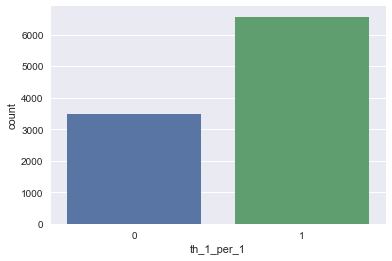

In [38]:
#sns.countplot(df['th_1_per_1'])
sns.countplot(df.th_1_per_1)


In [39]:
#pd.tools.plotting.radviz(df, 'eval_th_value')


In [40]:
df[11:][['arveres_id','th_1_per_1','th_eval_str','eval_th_quality']]
#df[11:][['arveres_id','th_1_per_1','eval_th_value','eval_th_quality','th_eval_str']]

,arveres_id,th_1_per_1,th_eval_str,eval_th_quality
11,308084,0,1/6,1.0
12,308085,1,1/1,1.0
13,308087,1,1/1,1.0
14,308625,1,1/1,1.0
15,309448,1,1/1,1.0
16,309596,1,1/1,1.0
17,309658,1,1/1,1.0
18,309707,1,1/1,1.0
19,309793,1,1/1,1.0
20,310725,1,1/1,1.0


In [41]:
submission = pd.DataFrame({
        'arveres_id': df[11:]['arveres_id'],
        'th_1_per_1': df[11:]['th_1_per_1'].astype(int),
        'th_eval_str': df[11:]['th_eval_str'],
        'eval_th_quality': df[11:]['eval_th_quality']    
    })
submission.to_csv('th_ok.csv', index=False)



# Tanulmány kódok



In [ ]:
print(eval('1/2+1/2'))
print(eval('95/100+5/100==1/1'))
print(eval('94/100+5/100==1/1'))

In [ ]:
print([ord('0'), ord('1')])
print(type(ord('1')))
print(isinstance(ord('1'),int))
print(isinstance('1',int))
print(type(eval('1/2+1/2')))

isinstance(eval('1/2+1/2'),float)

In [ ]:
str='012345abc -'
print(str[4].isdigit())

In [ ]:
str='012345abc -'
str is None

In [ ]:
#tanulmány a hátulról vagdosva haladós kiértékeléshez

a="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
print(len(a))
a[0:len(a)-1]
[x for x in range(len(a),0,-1)]
b=a.strip(' ')
#print(a, b)
for x in range(len(b),0,-1):
    #print(b[0:x])
    try:
        #ha '1/1' string szerepel benne, akkor eleve OK-nak vesszük
        eval_th_value_01=eval(b[0:x])

        if isinstance(eval_th_value_01, (int, float)):
            #int/float az eredmény kötőjel miatt néha negatív lesz, ezért abs()
            print([b[0:x],abs(eval_th_value_01)])
            #print(abs(eval_th_value_01))
            break

        else:
            #ha a kiértékelés eredménye True/False (pl. 1/4+1/4=1/2 is kiértékelhető)
            print([b[0:x],abs(eval_th_value_01)])

            pass

    except:
        #num_eval_th=0
        print([b[0:x],"Nem OK"])
        pass

    


In [ ]:
a="1 / 3 - 1/ 3 = 2/3 (mi lesz ebből"
list(a)
a.strip()
a.lstrip()
a.replace(' ','').replace('-',' +').replace('+',' + ').replace('=',' = ').split()
b=a.replace('-',' +').replace('+',' + ').replace('=',' = ').replace(' ','')
#a.replace(' ','').replace('-','+')
#a.replace(' -','-')
#list(a.replace(' ',''))
#len(set(a))
#b[:b.find('=')].split('+')
print(b[:b.find('=')])
b[:b.find('=')].count('/')
eval(b[:b.find('=')])

In [ ]:
a="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
a.split(' ')

In [ ]:
from string import punctuation
print(punctuation)


In [ ]:
tweet="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
tweet_processed=tweet.lower()
for p in list(punctuation):
    tweet_processed=tweet_processed.replace(p,'')
print(tweet_processed)    

In [ ]:
a='1/2+1/2 (összesen: 2*+-'
print(th_replace(a))

In [ ]:
import urllib
'''
url='http://www.unc.edu/~ncaren/haphazard/negative.txt'
file_name='negative.txt'
urllib.urlretrieve(url,file_name)

urllib.urlretrieve('http://www.unc.edu/~ncaren/haphazard/negative.txt','negative.txt')
'''
files=['negative.txt','positive.txt','obama_tweets.txt']
path='http://www.unc.edu/~ncaren/haphazard/'
for file_name in files:
    urllib.request.urlopen(path+file_name,file_name)


In [ ]:
tweets = open("obama_tweets.txt").read()
tweets_list = tweets.split('\n')
len(tweets_list)

for tweet in tweets_list[0:5]:
    print(tweet)

In [ ]:
abc  ='aábcdeéfghiíjklmnoóöőpqrstuúüűxyvz'
punct='.?!:*_'

tweet="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből.*?!"

abc_set      =set(abc)
punct_set    =set(punct)

abc_punct_set=set(abc+abc.upper()+punct)

tweet_set    =set(tweet)

for p in tweet_set:
    if p in abc_punct_set:
        print(p)


In [ ]:
abc  ='aábcdeéfghiíjklmnoóöőpqrstuúüűxyvz'
punct='.?!:*_'

tweet="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből.*?!".replace(' ','')

if '/' in tweet:

    print(tweet)
    
    pos=tweet.find('/')
    for i in range(pos+1,len(tweet)-(pos-1)):
        #print(tweet[i:i+1])
        if ' ' in tweet[i] or tweet[i].isnumeric():
            #print(tweet[i:i+1])
            pass
        else:
            break
   
    #print(i)
    print(int(tweet[pos+1:i].strip()))
        #print(tweet.find('/'))
        #print(tweet[tweet.find('/')])
    
    
    #for p in tweet_set:
    #    if p in abc_punct_set:
    #        print(p)


In [ ]:
abc  ='aábcdeéfghiíjklmnoóöőpqrstuúüűxyvz'
punct='.?!:*_'

#tweet="1 / 3 + 1/ 3 + 1/3= 3/3 (mi lesz ebből.*?!".replace(' ','').replace('=','+')
tweet="1 / 3 sz ebből.*?!".replace(' ','').replace('=','+')

if '/' in tweet:

    tweet_sep01=tweet.split('+')
    
    tweet_devider=None
    
    for x in tweet_sep01:
        x_01=x.split('/')
        
        #print([x_01, len(x_01)])
        
        if len(x_01)==2 and x_01[1].isnumeric():
            tweet_devider=int(x_01[1].strip())
            
            break
            
    
    
    
    
    print([tweet, tweet_sep01, tweet_devider])
    
    #pos=tweet.find('/')

    #print(tweet[pos+1:pos+3].strip())


In [ ]:
print(th_replace_devider(th_replace("1 / 3 + 1/ 3 = 2/3 (mi lesz ebből.*?!")))

In [ ]:
[x for x in range(2,3)]

In [ ]:
num_ertek=0.1666666

eval_th_str=int(round(1/num_ertek,0)+.5)
#eval_th_str=round(1/num_ertek,0)
     
eval_th_str_ret='1/'+str(eval_th_str)

print([eval_th_str,eval_th_str_ret])

#print(int(5.99+.5))


In [ ]:
teszt=pd.DataFrame({'A':[(1,2),(3,4),(5,6)]})
print(teszt)
#teszt.values
#print(teszt['A'][0][0])
#teszt['A'][0 : ]
print(teszt.A.map(lambda x: x[0]))
#print(teszt.A)

In [ ]:
teszt=pd.DataFrame({'A':[(1,2),(3,4),(5,6)]})
print(teszt)
print(teszt.A.map(lambda x: x[0]))

In [ ]:
teszt=pd.DataFrame({'A':['a','b','c']})
#print(teszt)
#print(teszt.A.map(lambda x: x[0]))
teszt.A+'/'+teszt.A
(teszt.A+'/').add(teszt.A)

In [ ]:
#th_replace_devider(th_replace("1 / 3 + 1/ 3 = 2/3 (mi lesz ebből.*?!"))


#print(th_1_per_1_keres("1 / 3 + 1/ 3 = 2/3 (mi lesz ebből.*?!"))
th_1_per_1_keres("1 / 3 + 1/ 3 = 2/3 , 1/1 (mi lesz ebből.*?!")



# Tanulmány kódok vége



# További próbálkozások, tanulmányok

In [42]:
# sorting the data acording to highest satisfaction level
sort = df[11:].sort_values(['tetel_tulajdoni_hanyad'], ascending = False)
sort.head(20)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
129,316714,adós,,"(None, None)",NaN,NaN,NaN,NaN,NaN,0
9993,345161,TESZT,,"(None, None)",NaN,NaN,NaN,NaN,NaN,0
9992,345156,TESZT,,"(None, None)",NaN,NaN,NaN,NaN,NaN,0
8454,339513,999/1000,999/1000,"(0.999, 1)",0.999000,1.0,1000.0,999.0,999/1000,0
7369,336854,99000/198000,99000/198000,"(0.5, 1)",0.500000,1.0,198000.0,99000.0,99000/198000,0
508,321104,99/100+1/100=1/1,99/100+1/100=1/1,"(1.0, 1)",1.000000,1.0,100.0,100.0,1/1,1
6600,335070,99/100+1/100=1/1,99/100+1/100=1/1,"(1.0, 1)",1.000000,1.0,100.0,100.0,1/1,1
9702,343859,99/100,99/100,"(0.99, 1)",0.990000,1.0,100.0,99.0,99/100,0
9416,342811,99/100,99/100,"(0.99, 1)",0.990000,1.0,100.0,99.0,99/100,0
7183,336349,99/100,99/100,"(0.99, 1)",0.990000,1.0,100.0,99.0,99/100,0


In [43]:
# printing the employee number with the hughest average monthly hours
sort = df.sort_values(['tetel_tulajdoni_hanyad'] , ascending = True)
sort.head(100)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
8437,339457,(1/1) 1/2-1/2,(1/1) 1/2+1/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
5279,332743,(1/1-ed 1/2+1/2),(1/1+ 1/2+1/2),"(2.0, 1)",2.000000,1.0,1.0,2.0,2/1,0
7147,336123,(1/2 + 1/2) = 1/1,(1/2 + 1/2) = 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
1643,324519,(1/2 + 1/2) = 1/1,(1/2 + 1/2) = 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
1128,323194,(1/2+1/2) 1/1,(1/2+1/2) 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
6221,334436,(1/2+1/2) 1/1,(1/2+1/2) 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
4049,330272,(1/2+1/2) 1/1,(1/2+1/2) 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
8501,339611,(1/2-1/2) 1/1,(1/2+1/2) 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
4392,331031,(1/2-1/2)= 1/1,(1/2+1/2)= 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
8637,340031,(1/2-1/2)= 1/1,(1/2+1/2)= 1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1


In [44]:
df['th_1_per_1'].sum(axis=0)

6567

In [45]:
df.describe()
#df.count()
#pd.value_counts()


,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_1_per_1
count,10038.000000,10038.000000,1.000600e+04,10006.000000,10044.000000
mean,0.824036,1.000797,7.541481e+02,118.505926,0.653823
std,1.807796,0.039918,2.145081e+04,3577.998754,0.475774
min,0.005000,1.000000,1.000000e+00,1.000000,0.000000
25%,0.500000,1.000000,1.000000e+00,1.000000,0.000000
50%,1.000000,1.000000,1.000000e+00,1.000000,1.000000
75%,1.000000,1.000000,2.000000e+00,2.000000,1.000000
max,175.305000,3.000000,1.200000e+06,217788.000000,1.000000


In [47]:
# Method 2: To simply print out the maximum value of eval_th by simply 
# accessing the column in the dataset

[df['eval_th_value'].min(), df['eval_th_value'].max()]

[0.0050000000000000001, 175.30500000000001]

In [48]:
# To print the tetel_tulajdoni_hanyad associated with the highest eval_th
df['tetel_tulajdoni_hanyad'][df['eval_th_value']==df['eval_th_value'].max()]

7981    240/1000+65/1000+175
Name: tetel_tulajdoni_hanyad, dtype: object

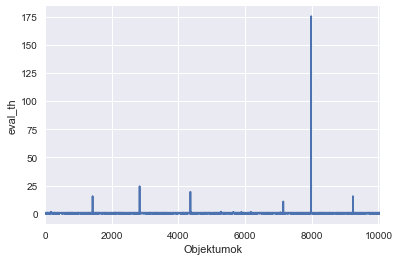

In [49]:
# Creating a graph of the eval_th
ax = df['eval_th_value'].plot()
#print(ax)
ax.set_xlabel('Objektumok')
ax.set_ylabel('eval_th')


In [51]:
# To print the unique values of the column sales
df['eval_th_value'].unique()
# To print them as a list
for x in df['eval_th_value'].unique():
    print(x)

0.166666666667
1.0
nan
0.5
0.25
0.142857142857
0.272727272727
0.0357142857143
0.9
0.375
0.7
0.666666666667
0.707930367505
0.2
0.0440487347704
1.83333333333
0.333333333333
0.708333333333
0.1
0.50009825113
0.047619047619
0.21
0.0833333333333
0.264445754717
0.75
0.6
0.4
1.0
0.464285714286
0.125
0.324155193992
0.0138029111594
0.0529010238908
0.4608
0.28125
0.725
0.055
0.879166666667
0.0138339920949
0.146533973919
0.444444444444
0.0555555555556
0.388888888889
0.0277777777778
0.0078125
0.324098036231
0.0625
0.18149
0.309523809524
0.833333333333
0.05
0.107142857143
0.241071428571
0.65625
0.065
0.5121
0.00892857142857
0.059009009009
0.145833333333
0.785714285714
0.858
0.875
0.437665782493
0.0487711680417
0.101067887109
0.7433
0.325
0.0909090909091
0.0714285714286
0.00833333333333
0.039
0.716666666667
0.283333333333
15.7115384615
0.249
0.916666666667
0.416666666667
0.0729166666667
0.0333333333333
0.48623853211
0.0370096225019
0.3125
0.005
0.0809
0.633333333333
0.448412698413
0.539393939394
0.37

In [52]:
df.sort_values(['eval_th_value'] , ascending = True)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
6664,335206,1/200,1/200,"(0.005, 1)",0.005000,1.0,200.0,1.000000,1/200,0
1558,324293,1/200,1/200,"(0.005, 1)",0.005000,1.0,200.0,1.000000,1/200,0
3417,328834,22/3067,22/3067,"(0.007173133355070101, 1)",0.007173,1.0,3067.0,22.000000,22/3067,0
853,322550,3/384,3/384,"(0.0078125, 1)",0.007812,1.0,384.0,3.000000,3/384,0
1313,323646,1/120,1/120,"(0.008333333333333333, 1)",0.008333,1.0,120.0,1.000000,1/120,0
8184,338634,1/120,1/120,"(0.008333333333333333, 1)",0.008333,1.0,120.0,1.000000,1/120,0
1094,323119,18/2016,18/2016,"(0.008928571428571428, 1)",0.008929,1.0,2016.0,18.000000,18/2016,0
9484,343081,1/100,1/100,"(0.01, 1)",0.010000,1.0,100.0,1.000000,1/100,0
9417,342812,1/100,1/100,"(0.01, 1)",0.010000,1.0,100.0,1.000000,1/100,0
5957,333963,2/192,2/192,"(0.010416666666666666, 1)",0.010417,1.0,192.0,2.000000,2/192,0


In [53]:
# adding a new column to the dataset
df['NewCol'] = 5
df.head()

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1,NewCol
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6,0,5
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1,5
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1,5
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1,5
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1,5


In [54]:
# Modifying the value of our new column 
df['NewCol'] = df['NewCol'] * 2
df.head()

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1,NewCol
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6,0,10
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1,10
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1,10
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1,10
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1,10


In [55]:
# Deleting the new column
del df['NewCol']
df.head()

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6,0
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1


In [56]:
df

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6,0
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
5,309596,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
6,309658,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
7,309707,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
8,309793,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
9,310725,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1


In [57]:
# The "loc" function is used to select pieces of the dataframe.
df.loc[0:20]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6,0
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
5,309596,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
6,309658,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
7,309707,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
8,309793,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
9,310725,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1


In [58]:
df[0:20][['eval_th_value','th_1_per_1']]

,eval_th_value,th_1_per_1
0,0.166667,0
1,1.000000,1
2,1.000000,1
3,1.000000,1
4,1.000000,1
5,1.000000,1
6,1.000000,1
7,1.000000,1
8,1.000000,1
9,1.000000,1


In [59]:
df[0:20:2]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6,0
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
6,309658,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
8,309793,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
10,arveres_id,tetel_tulajdoni_hanyad,,"(None, None)",NaN,NaN,NaN,NaN,NaN,0
12,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
14,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,1/1,1
16,309596,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
18,309707,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1


In [60]:
df.loc[21:40]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
21,310726,1/1,1/1,"(1.0, 1)",1.0,1.0,1.0,1.0,1/1,1
22,310917,1/1,1/1,"(1.0, 1)",1.0,1.0,1.0,1.0,1/1,1
23,310955,1/1,1/1,"(1.0, 1)",1.0,1.0,1.0,1.0,1/1,1
24,311132,1/2,1/2,"(0.5, 1)",0.5,1.0,2.0,1.0,1/2,0
25,311133,1/2,1/2,"(0.5, 1)",0.5,1.0,2.0,1.0,1/2,0
26,311137,1/1,1/1,"(1.0, 1)",1.0,1.0,1.0,1.0,1/1,1
27,311323,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.0,1.0,2.0,2.0,1/1,1
28,311324,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.0,1.0,2.0,2.0,1/1,1
29,311325,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.0,1.0,2.0,2.0,1/1,1
30,311576,1/1,1/1,"(1.0, 1)",1.0,1.0,1.0,1.0,1/1,1


In [61]:
# Slicing a part of the dataframe of one column---Location based indexing 
df.ix[0:5,['eval_th_value','th_1_per_1']]

,eval_th_value,th_1_per_1
0,0.166667,0
1,1.000000,1
2,1.000000,1
3,1.000000,1
4,1.000000,1
5,1.000000,1


In [62]:
# To select bottom records
df.tail()

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
10039,345680,1/8,1/8,"(0.125, 1)",0.125,1.0,8.0,1.0,1/8,0
10040,345711,1/1,1/1,"(1.0, 1)",1.000,1.0,1.0,1.0,1/1,1
10041,345719,1/1,1/1,"(1.0, 1)",1.000,1.0,1.0,1.0,1/1,1
10042,345762,1/2 + 1/2,1/2 + 1/2,"(1.0, 1)",1.000,1.0,2.0,2.0,1/1,1
10043,345764,1/1,1/1,"(1.0, 1)",1.000,1.0,1.0,1.0,1/1,1


In [63]:
# Testing the function value counts
df['eval_th_value'].value_counts()

1.000000    6567
0.500000    1981
0.250000     392
0.166667     149
0.333333     127
0.125000      94
0.083333      44
0.750000      44
0.666667      32
0.200000      30
0.100000      29
0.375000      16
0.142857      14
1.000000      12
0.900000      12
0.400000      11
0.050000      10
0.062500       9
0.600000       9
0.071429       8
0.875000       7
0.416667       7
0.300000       7
0.800000       7
0.833333       7
0.700000       6
0.158333       6
0.625000       6
0.055556       5
0.150000       5
            ... 
0.184211       1
0.637500       1
0.281421       1
0.916667       1
0.422222       1
0.541667       1
0.072183       1
0.285714       1
0.819672       1
0.047000       1
0.027550       1
0.214286       1
1.441877       1
0.314815       1
0.976200       1
0.642857       1
0.708333       1
0.012000       1
0.117284       1
0.281233       1
0.666667       1
0.772727       1
0.216393       1
0.416320       1
0.460800       1
0.039000       1
0.010841       1
0.485000      

In [64]:
df['tetel_tulajdoni_hanyad'].value_counts()

1/1                     4883
1/2                     1574
1/2+1/2                  307
1/4                      301
1/2+1/2=1/1              277
2/4                      132
1/6                      114
2/2                      108
1/2 + 1/2                 90
1/3                       69
1/1 (1/2+1/2)             67
1/8                       63
1/2 + 1/2 = 1/1           56
1/2-1/2                   53
1/1 (1/2-1/2)             46
1/2.                      42
1/1.                      38
2/6                       32
1/1-ed                    32
1/12                      30
3/6                       30
2/8                       29
1/2 + 1/2 = 2/2           28
4/8                       28
1/2+1/2=2/2               25
1/10                      23
3/4                       22
4/4                       21
1/2+1/2 mindösszesen      19
1/5                       18
                        ... 
43750/100000               1
1/4+1/4+2/4 = 4/4          1
16/120                     1
99000/198000  

In [65]:
df['th_cleared'].value_counts()

1/1                     4921
1/2                     1616
1/2+1/2                  380
1/4                      303
1/2+1/2=1/1              286
2/4                      134
1/6                      114
1/1 (1/2+1/2)            113
2/2                      109
1/2 + 1/2                104
1/3                       71
1/8                       64
1/2 + 1/2 = 1/1           59
2/6                       32
1/1+                      32
1/12                      31
2/8                       30
3/6                       30
4/8                       28
1/2 + 1/2 = 2/2           28
1/2+1/2=2/2               25
1/10                      23
3/4                       22
4/4                       21
1/5                       18
6/12                      15
1/2+1/2 (1/1)             15
3/12                      15
1/1(1/2+1/2)              15
1/2+                      15
                        ... 
460/1811                   1
2/8+2/8 = 4/8              1
6/7+1/7 = 1/1              1
290/601       

In [66]:
# Testing the function value counts
df['th_1_per_1'].value_counts()

1    6567
0    3477
Name: th_1_per_1, dtype: int64

In [67]:
 #column names to a list
df.columns.tolist()

['arveres_id',
 'tetel_tulajdoni_hanyad',
 'th_cleared',
 'eval_th_dbl',
 'eval_th_value',
 'eval_th_quality',
 'th_str_div',
 'th_str_dvd',
 'th_eval_str',
 'th_1_per_1']